# Enjoy  BabyEnv

See observation data, action space and all stuff contained in BabyEnv

In [1]:
import gym
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import baby.envs
from baby.envs.baby_env import default_conf

In [2]:
# Create env
env = gym.make('baby-v0')

In [3]:
# Check observation space
env.observation_space

Box(9, 21, 21)

In [4]:
# Check action space
env.action_space

Discrete(189)

In [5]:
# See full configuration
print(json.dumps(env.conf, indent=4))

{
    "seed": 0,
    "n_frame": 20,
    "n-xaxis": 21,
    "n-yaxis": 9,
    "max_episode_iteration": 1000,
    "alpha_ground_truth": 0.8,
    "validation_threshold": 0.8,
    "sigma_prediction": 1.0,
    "gamma_gaussian_value": 0.5,
    "sigma_gaussian_value": 1.0,
    "reward": {
        "timestep": 0,
        "validation": 1
    }
}


In [6]:
env.conf['sigma_prediction'] = 0.5
env.conf['gamma_gaussian_value'] = 1.0
env.conf['sigma_gaussian_value'] = 0.4

### Ground-truth
Ground truth are matrix generated with numpy random and filter gaussian 
in oder to have geographical consistency between frames

In [7]:
# Take first n frames
n=10

env.reset()
first_frame_truth = env.ground_truth[:, :, :n]
first_frame_truth = np.swapaxes(first_frame_truth, axis1=-1, axis2=0)

Frame #0 | shape=(21, 9)


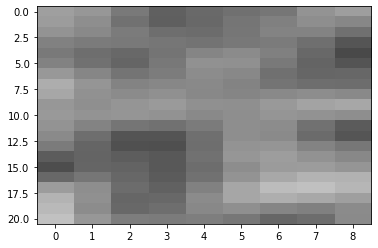

Frame #1 | shape=(21, 9)


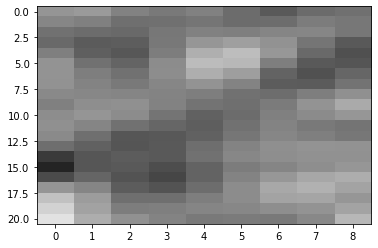

Frame #2 | shape=(21, 9)


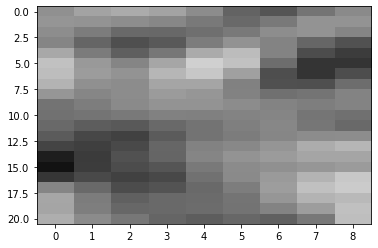

Frame #3 | shape=(21, 9)


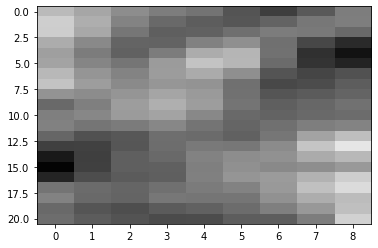

Frame #4 | shape=(21, 9)


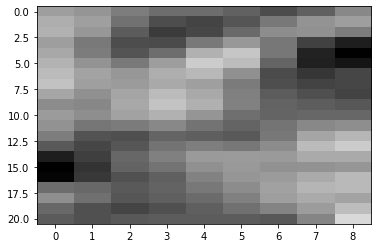

Frame #5 | shape=(21, 9)


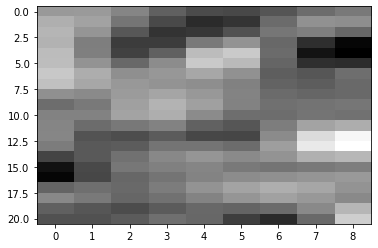

Frame #6 | shape=(21, 9)


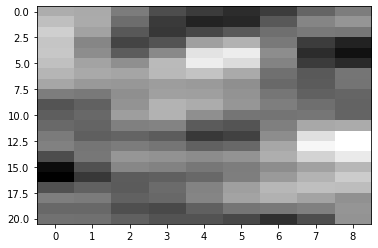

Frame #7 | shape=(21, 9)


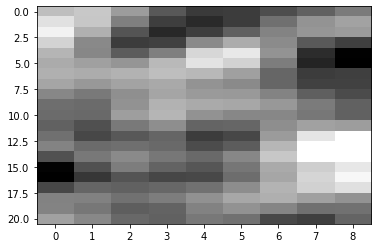

Frame #8 | shape=(21, 9)


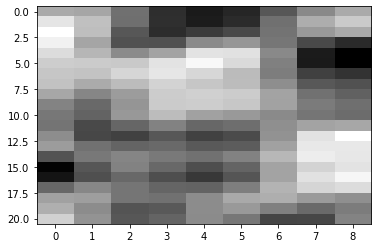

Frame #9 | shape=(21, 9)


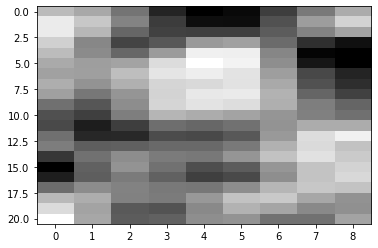

In [8]:
for num, frame in enumerate(first_frame_truth):
    print(f"Frame #{num} | shape={frame.shape}")
    
    # For visual representation flip vertical axis
    frame_repr = np.flip(frame, axis=0)
    
    # Show into notebook in grayscale
    plt.imshow(frame, cmap='gray', vmin=0.0, vmax=1.0, interpolation='nearest', aspect='auto')
    plt.show()

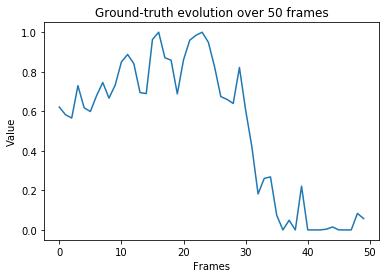

In [9]:
# Visual evolution of a single point (0, 0) over n frames
n=50
truth_evo = env.ground_truth[0, 0, :n]
plt.plot(truth_evo)
plt.title(f'Ground-truth evolution over {n} frames')
plt.xlabel('Frames')
plt.ylabel('Value')
plt.show()

In [10]:
# Overall statistics over frames
print(f"Mean ground truth: {np.mean(env.ground_truth)}")
print(f"Std deviation ground truth: {np.std(env.ground_truth)}")

Mean ground truth: 0.5163241333509733
Std deviation ground truth: 0.30487247723217065


## Impact of alpha_ground_truth on ground truth evolution
Modifying conf to see different options

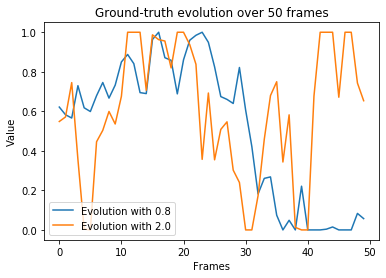

In [11]:
stored_ground_truth_prev_value = np.copy(env.ground_truth[0, 0, :n])
origin_alpha = env.conf['alpha_ground_truth']
env.conf['alpha_ground_truth'] = 2.0

# Reset ground truth
env.reset()

plt.plot(stored_ground_truth_prev_value, label=f"Evolution with {origin_alpha}")
plt.plot(env.ground_truth[0, 0, :n], label=f"Evolution with {env.conf['alpha_ground_truth']}")
plt.title(f'Ground-truth evolution over {n} frames')
plt.xlabel('Frames')
plt.ylabel('Value')
plt.legend()
plt.show()

In [12]:
# Restore old value
env.conf['alpha_ground_truth'] = origin_alpha

## Forecast compared to ground-truth

In [13]:
def show_prediction_ground_truth():
    obs = env.reset()
    print(f"Show pred/truth with sigma={env.conf['sigma_prediction']}")

    plt.figure(figsize=obs.shape[:2])
    columns = 2
    
    t=0
    i_plt = 0

    for i in range(0,env.conf['n_frame']):
        error = obs[:, :, i] - env.ground_truth[:, :, t]
        print(f"Frame {i} // Mean error = {np.mean(error)} // std = {np.std(error)}")
        
        plt.subplot(2*env.conf['n_frame'] / columns + 1, columns, i_plt + 1)
        plt.imshow(obs[:,:,i], cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

        i_plt += 1

        plt.subplot(2*env.conf['n_frame'] / columns + 1, columns, i_plt + 1)
        plt.imshow(env.ground_truth[:,:,t], cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

        i_plt += 1
        
        t=i+1
        

Show pred/truth with sigma=0.5
Frame 0 // Mean error = 0.02490902550135918 // std = 0.18032201487061666
Frame 1 // Mean error = -0.011998343721527855 // std = 0.1711091390179328
Frame 2 // Mean error = 0.015370308393707564 // std = 0.17936030205110093
Frame 3 // Mean error = -0.04747215552952863 // std = 0.15585888925085203
Frame 4 // Mean error = 0.013118029725473575 // std = 0.196131185165569
Frame 5 // Mean error = 0.05766985761776608 // std = 0.22441408336447818
Frame 6 // Mean error = -7.480035981326069e-05 // std = 0.19026568383176984
Frame 7 // Mean error = 0.005259474200935511 // std = 0.17177835423121626
Frame 8 // Mean error = -0.026368179597757457 // std = 0.2139793621361482
Frame 9 // Mean error = 0.1084043659052011 // std = 0.2107134681409216
Frame 10 // Mean error = -0.03409504617443116 // std = 0.21792477135515553
Frame 11 // Mean error = -0.08616673519034641 // std = 0.2118636524280803
Frame 12 // Mean error = 0.028971698808731086 // std = 0.2421645808049686
Frame 13 //

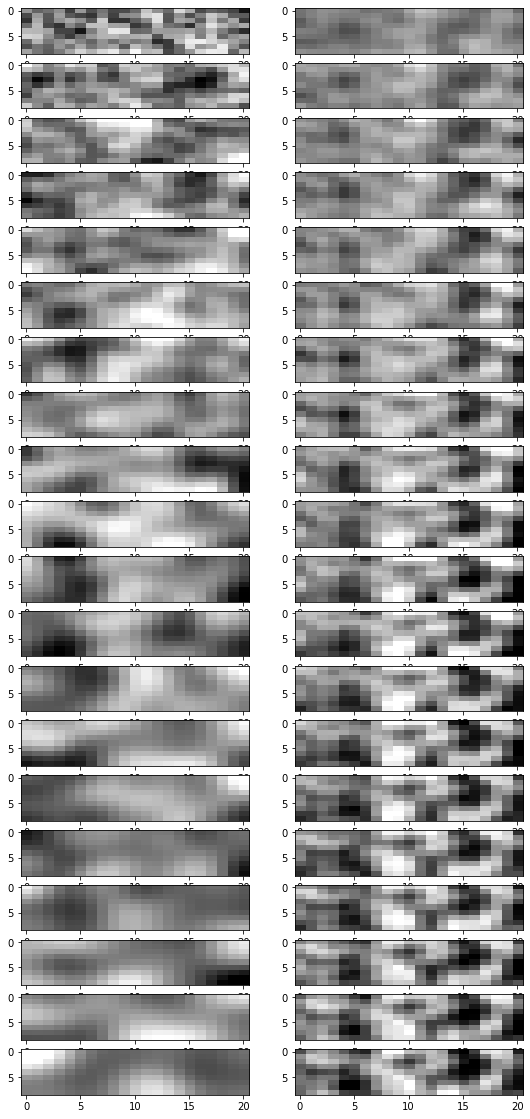

In [14]:
# Show with initial configuration
show_prediction_ground_truth()

Show pred/truth with sigma=0.8
Frame 0 // Mean error = -0.011129798846039532 // std = 0.14710751827351898
Frame 1 // Mean error = 0.031972085655864325 // std = 0.14253298391107008
Frame 2 // Mean error = -0.07534949255609741 // std = 0.19642433044313184
Frame 3 // Mean error = 0.018063221713267734 // std = 0.17358929450446686
Frame 4 // Mean error = 0.013063960663916427 // std = 0.18139926794622666
Frame 5 // Mean error = -0.030572213850337156 // std = 0.22841581692068688
Frame 6 // Mean error = -0.05824124674192265 // std = 0.21188171833403197
Frame 7 // Mean error = -0.02686352033162226 // std = 0.17945190090849528
Frame 8 // Mean error = 0.08015247378753704 // std = 0.2342698348558689
Frame 9 // Mean error = 0.1650878571159206 // std = 0.21200149499506207
Frame 10 // Mean error = -0.05330442380175485 // std = 0.20540323660362145
Frame 11 // Mean error = -0.1851629814230641 // std = 0.2059735939664148
Frame 12 // Mean error = 0.08678723856312903 // std = 0.22339566318842485
Frame 13 

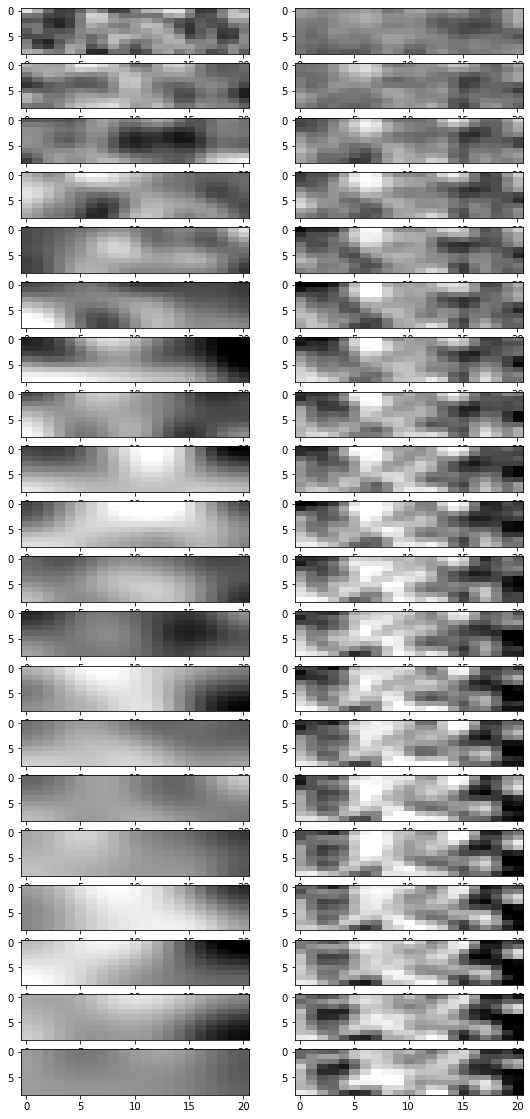

In [28]:
env.conf['sigma_prediction'] = 0.8
env.conf['gamma_gaussian_value'] = 1.3
env.conf['sigma_gaussian_value'] = 0.5

show_prediction_ground_truth()